In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('Platinum.csv')
df.head(5)

,Date,Open,Close,High,Low
0,3/26/2024,904.0,904.5,909.5,900.5
1,3/25/2024,898.5,904.5,913.5,898.5
2,3/24/2024,0.0,898.0,899.0,0.0
3,3/23/2024,897.5,897.5,897.5,897.5
4,3/22/2024,909.0,897.5,913.0,896.0


In [3]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df.Date)

# Sắp xếp lại index
df = df.sort_index(ascending=False)
df

,Date,Open,Close,High,Low
1694,2019-03-01,871.0,860.0,874.5,857.5
1693,2019-03-03,860.0,860.5,860.5,860.0
1692,2019-03-04,863.0,836.5,864.0,835.0
1691,2019-03-05,836.5,837.0,840.5,833.0
1690,2019-03-06,836.0,827.0,837.5,825.0
...,...,...,...,...,...
4,2024-03-22,909.0,897.5,913.0,896.0
3,2024-03-23,897.5,897.5,897.5,897.5
2,2024-03-24,0.0,898.0,899.0,0.0
1,2024-03-25,898.5,904.5,913.5,898.5


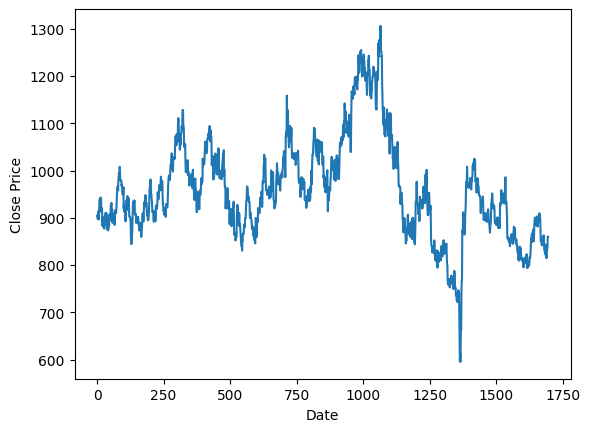

In [4]:
# Vẽ biểu đồ chuỗi thời gian
plt.plot(df.index, df["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [5]:
df = df[['Close']]
df = df.dropna()
df = df.reset_index(drop=True)
df.head(5)

,Close
0,860.0
1,860.5
2,836.5
3,837.0
4,827.0


In [6]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [7]:
# Chia train test theo tỉ lệ 8:2
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [8]:
train_data

array([[0.37271449],
       [0.37341772],
       [0.33966245],
       ...,
       [0.55627286],
       [0.60056259],
       [0.57243319]])

In [9]:
# Chuẩn bị dữ liệu cho x,y
def create_dataset(dataset, lags=1):
    X, Y = [], []
    for i in range(len(dataset)-lags-1):
        a = dataset[i:(i+lags), 0]
        X.append(a)
        Y.append(dataset[i + lags, 0])
    return np.array(X), np.array(Y)

In [10]:
#Thiết lập tham số cho model
lags = 30 
X_train, y_train = create_dataset(train_data, lags)
X_test, y_test = create_dataset(test_data, lags)

In [11]:
X_test

array([[0.58509142, 0.58509142, 0.58509142, ..., 0.63150492, 0.66104079,
        0.66104079],
       [0.58509142, 0.58509142, 0.58509142, ..., 0.66104079, 0.66104079,
        0.66104079],
       [0.58509142, 0.58509142, 0.56469761, ..., 0.66104079, 0.66104079,
        0.68846695],
       ...,
       [0.43319269, 0.44374121, 0.40857947, ..., 0.45007032, 0.4416315 ,
        0.4254571 ],
       [0.44374121, 0.40857947, 0.43108298, ..., 0.4416315 , 0.4254571 ,
        0.4254571 ],
       [0.40857947, 0.43108298, 0.43319269, ..., 0.4254571 , 0.4254571 ,
        0.42616034]])

In [12]:
#In thông tin kích thước của dữ liệu
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1325, 30) (1325,)
(308, 30) (308,)


In [13]:
model = SVR()

# Thiết lập phạm vi tốt cho các tham số
C_range = [0.1, 1, 10]  # Thay đổi tại đây
gamma_range = [0.01, 0.1, 1]  # Thay đổi tại đây
kernel_range = ['rbf', 'poly', 'linear', 'sigmoid'] #tạo ra 3 giá trị cho kernel

# Tạo lưới các giá trị tham số
param_grid = {'C': C_range, 'gamma': gamma_range, 'kernel': kernel_range}

# Thiết lập model với các tham số và số lượng folds cross-validation
model = GridSearchCV(model, param_grid, refit=True, verbose=3, cv=5, scoring='neg_mean_squared_error')

#trong đó:
#clf: model
#param_grid: tham số
#refit: lưu lại model tốt nhất
#verbose: hiển thị thông tin
#cv: số lượng folds cross-validation (chọn 5 folds cross-validation)
#scoring: đánh giá model bằng MSE

#8. Huấn luyện model
model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.009 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.016 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.015 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.034 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.072 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.007 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.006 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.01, kernel=linear;, score=-0.001 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.01, kernel=linear;

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=3)

In [14]:
model.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}

In [15]:
#Dự báo dự liệu dựa trên tập test
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()

In [16]:
y_pred

array([1067.17254112, 1069.5370158 , 1070.80534404, 1093.6513493 ,
       1102.95348129, 1087.1457802 , 1059.74742008, 1046.05908961,
       1046.36011451, 1057.1761765 , 1068.31926884, 1060.69417888,
       1072.95440514, 1072.33222623, 1067.88772979, 1073.87577834,
       1062.32011492, 1050.67763397, 1029.9021275 , 1021.15858999,
       1022.50868431, 1022.11801072, 1020.2543467 , 1014.01137383,
        998.00867171, 1002.30972866, 1000.25071261, 1001.0532973 ,
       1021.26234201, 1027.92828261, 1017.96868463,  996.77257887,
        990.23787825,  995.09879653,  988.71601798,  983.76423257,
        973.01266836,  975.48883573,  984.56360096,  991.17449233,
        989.42576011,  982.51456732,  968.79865859,  951.54067289,
        937.00064147,  926.66124925,  922.39923764,  921.63868124,
        918.96739025,  916.41662881,  912.92347612,  900.90021367,
        898.0066391 ,  900.29004713,  905.32895965,  906.14478446,
        900.89093653,  894.0331526 ,  894.99085966,  895.35467

In [17]:
# 10. Đánh giá độ chính xác thuật toán bằng MAPE, MSE và RMSE

#MAPE
test_mape = mean_absolute_percentage_error(y_pred, y_test)
#MSE
test_mse = mean_squared_error(y_pred, y_test)
#RMSE
test_rmse = np.sqrt(test_mse)

print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)
print('Testing RMSE:', test_rmse)

Testing MAPE: 0.9994895749996473
Testing MSE: 874231.376524246
Testing RMSE: 935.003409899796


In [18]:
# Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
lags=30
i=0
while(i<30):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output.append(yhat)
        i=i+1


0 day input [0.43319269 0.43319269 0.39662447 0.41912799 0.40225035 0.40084388
 0.41279887 0.40646976 0.42967651 0.40576653 0.44514768 0.45780591
 0.44585091 0.45007032 0.4838256  0.46413502 0.48945148 0.46835443
 0.48452883 0.48452883 0.48312236 0.45147679 0.42405063 0.45007032
 0.4416315  0.4254571  0.4254571  0.42616034 0.43530239 0.43530239]
0 day output 0.4440093641362133
1 day input [0.43319269 0.39662447 0.41912799 0.40225035 0.40084388 0.41279887
 0.40646976 0.42967651 0.40576653 0.44514768 0.45780591 0.44585091
 0.45007032 0.4838256  0.46413502 0.48945148 0.46835443 0.48452883
 0.48452883 0.48312236 0.45147679 0.42405063 0.45007032 0.4416315
 0.4254571  0.4254571  0.42616034 0.43530239 0.43530239 0.44400936]
1 day output 0.44865504853192983
2 day input [0.39662447 0.41912799 0.40225035 0.40084388 0.41279887 0.40646976
 0.42967651 0.40576653 0.44514768 0.45780591 0.44585091 0.45007032
 0.4838256  0.46413502 0.48945148 0.46835443 0.48452883 0.48452883
 0.48312236 0.45147679 0.42

In [19]:
# Inverse transform the future predictions
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).flatten()

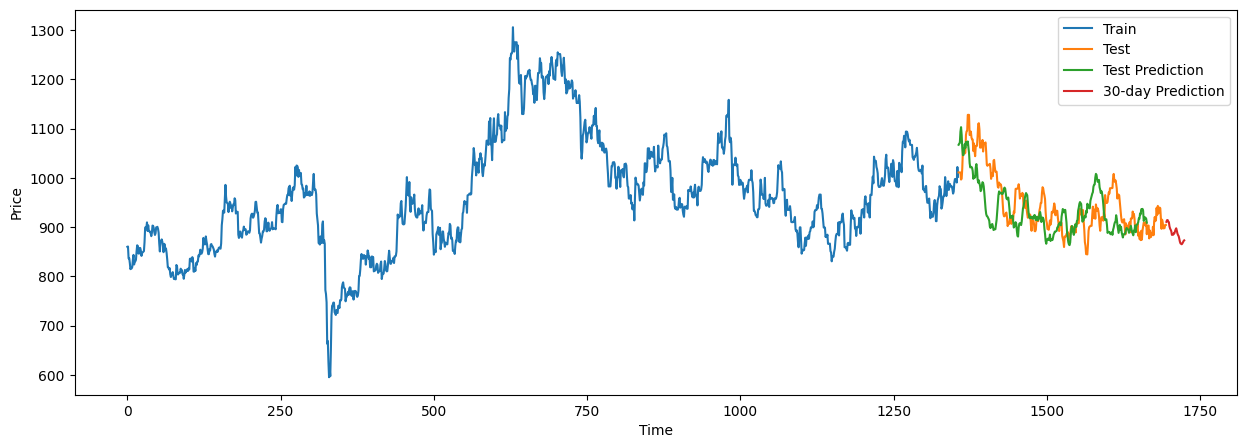

In [20]:
plt.figure(figsize=(15,5))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_pred_index = pd.RangeIndex(start=train_size, stop=train_size+len(y_pred), step=1)
plt.plot(test_pred_index, y_pred)

next_30days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output), step=1)
plt.plot(next_30days_pred_index, lst_output)

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['Train', 'Test', 'Test Prediction', '30-day Prediction'])
plt.show()